In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml

Datensatz importien MNIST aus den Buch Seite s. 90

In [2]:
#ssl._create_default_https_context = ssl._create_unverified_contex
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()


/Users/riccardo/Desktop/Buch_-bungen/vision/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,y = mnist['data'],mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

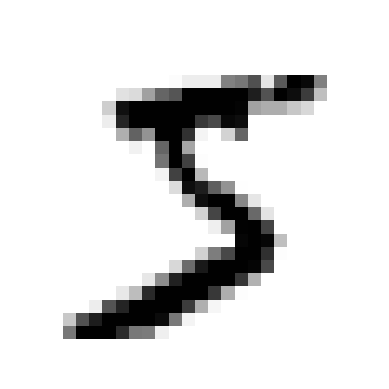

In [4]:
import matplotlib.pyplot as plt

some_digit = X.iloc[0]  # Assuming X is a DataFrame, use .iloc[0] to access the first row
some_digit_image = some_digit.values.reshape(28, 28)  # Convert to numpy array and reshape
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')  # Use 'off' instead of 'xais' to remove the axis labels
plt.show()


Datentypen ändern, damit wir die als Integers haben

In [5]:
import numpy as np
y = y.astype(int)


Training Daten sowie Test auf aufspitten. Damit wir in der Zukunft das Modell training können

In [6]:
X_train,X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [9]:
from sklearn.linear_model import SGDClassifier 
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [10]:
sgd_clf.predict([some_digit])

/Users/riccardo/Desktop/Buch_-bungen/vision/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train,y_train_5, cv = 3, scoring='accuracy')


array([0.95035, 0.96035, 0.9604 ])

In [13]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [14]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3, scoring = 'accuracy')

array([0.91125, 0.90855, 0.90915])

weiter machen mit der Konfusionsmatrix da die 'accuracy' kritisch begutachtet werden sollte da das Model nicht so gut ist wie es aussieht.

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)
# Zusammenfassung was uns diese Matrix sagt da dieses doch sehr wichtig ist, da hier viele falsche interpretationen entstehen können.


array([[53892,   687],
       [ 1891,  3530]])

- array([[53892,   687],
-       [ 1891,  3530]])

- Der obere Rechte wert: Nicht 5er Bilder negative Kategorie das sind korrekte nicht 5er bilder Klassifikationen
- Der obere Linke Wert : 687 wurden fälsicher weise als 5 er klassifiziert, obwohl die keine sind.
- Der untere rechte Wert: 1891 wurden fälischer weise nicht als 5 er Klassifiziert, obwohl sie 5 er bilder sind.
- Der untere linke Wert: 4096 sind Korrekte vorhersagen also 5er bilder die tatsächlich 5er bilder sind.

Allgemein wichtig wir dürfen nicht vergessen das die Accucary sehr hoch war mit 90 % jedoch merken wir durch die Konfusions Matrix doch sehr viele fehler passieren können

In [20]:
y_train_perfect_predicitons = y_train_5 # wir tun so wir perfekt wären
confusion_matrix(y_train_5, y_train_perfect_predicitons)


array([[54579,     0],
       [    0,  5421]])

- array([[54579,     0],
-       [    0,  5421]])
- Das wäre die optimale grafik die in der Realtiät niemals auftaucht, da wir sehen können 
- das alle 5 er richtig klassifizert wurden Zahl(5421)
- und alle nicht 5er Bilder richtig ausgemustert wurden Zahl(54579)



## Sklearn hat viele Möglichkeiten zu der Berechnung der Klassifikaitionen darunter fallen die Relvant sowie die Sensitivität

In [26]:
from sklearn.metrics import precision_score, recall_score
print((precision_score(y_train_5, y_train_pred))) # Brechnung 5421 == (3530 + 687 )
print(recall_score(y_train_5, y_train_pred))  

0.8370879772350012
0.6511713705958311


langsam durch und sagen was die metriken überhaupt bedeutet satt es einfach abzuschreiben